In [3]:
import requests as r

In [4]:
url = 'https://api.covid19api.com/dayone/country/brazil'
resp = r.get(url)

In [6]:
raw_data = resp.json()

In [79]:
final_data = []
for obs in raw_data:
    final_data.append([obs['Confirmed'], obs['Deaths'], obs['Recovered'], obs['Active'], obs['Date']])

In [99]:
final_data.insert(0, ['confirmados', 'óbitos', 'recuperados', 'ativos', 'data'])

In [81]:
confirmados = 0
obitos = 1
recuperados = 2
ativos = 3
data = 4

In [82]:
for pos in range(1, len(final_data)):
    final_data[pos][data] = final_data[pos][data][:10]

In [84]:
import datetime as dt

In [85]:
print(dt.time(12, 6, 21, 7),'Hora:minuto:segundo:microsegundo')
print('-----')
print(dt.date(2020, 4, 25), 'Ano-mês-dia')
print('-----')
print(dt.datetime(2020, 4, 25, 12, 6, 21, 7), 'Ano-mês-dia Hora:minuto:segundo:microsegundo')

12:06:21.000007 Hora:minuto:segundo:microsegundo
-----
2020-04-25 Ano-mês-dia
-----
2020-04-25 12:06:21.000007 Ano-mês-dia Hora:minuto:segundo:microsegundo


In [86]:
natal = dt.date(2021, 12, 25)
reveillon = dt.date(2022, 1, 1)

print(reveillon - natal)
print((reveillon - natal).days)
print((reveillon - natal).seconds)
print((reveillon - natal).microseconds)

7 days, 0:00:00
7
0
0


In [87]:
import csv

In [88]:
with open('brasil_covid.csv', 'w', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerows(final_data)

In [89]:
for i in range(1, len(final_data)):
    final_data[i][data] = dt.datetime.strptime(final_data[i][data], '%Y-%m-%d')

In [91]:
def get_datasets(y, labels):
    if type(y[0]) == list:
        datasets = []
        for i in range(len(y)):
            datasets.append(
            {
                'label': labels[i],
                'data': y[i]
            }
        )
        return datasets
    else:
        return [
            {
                'label': labels[0],
                'data': y
            }
        ]

In [92]:
def set_title(title=''):
    if title != '':
        display = 'true'
    else:
        display = 'false'
    return {
        'title': title,
        'display': display
    }

In [93]:
def create_chart(x, y, labels, kind='bar', title=''):
    datasets = get_datasets(y, labels)
    options = set_title(title)
    
    chart = {
        'type': kind,
        'data': {
            'labels': x,
            'datasets': datasets
        },
        'options': options
    }
    
    return chart

In [94]:
def get_api_chart(chart):
    url_base = 'https://quickchart.io/charts'
    reps = r.get(f'{url_base}?c={str(chart)}')
    return reps.content

In [95]:
def save_image(path, content):
    with open(path, 'wb') as image:
        image.write(content)

In [96]:
from PIL import Image
from IPython.display import display

In [97]:
def display_image(path):
    img_pil = Image.open(path)
    display(img_pil)

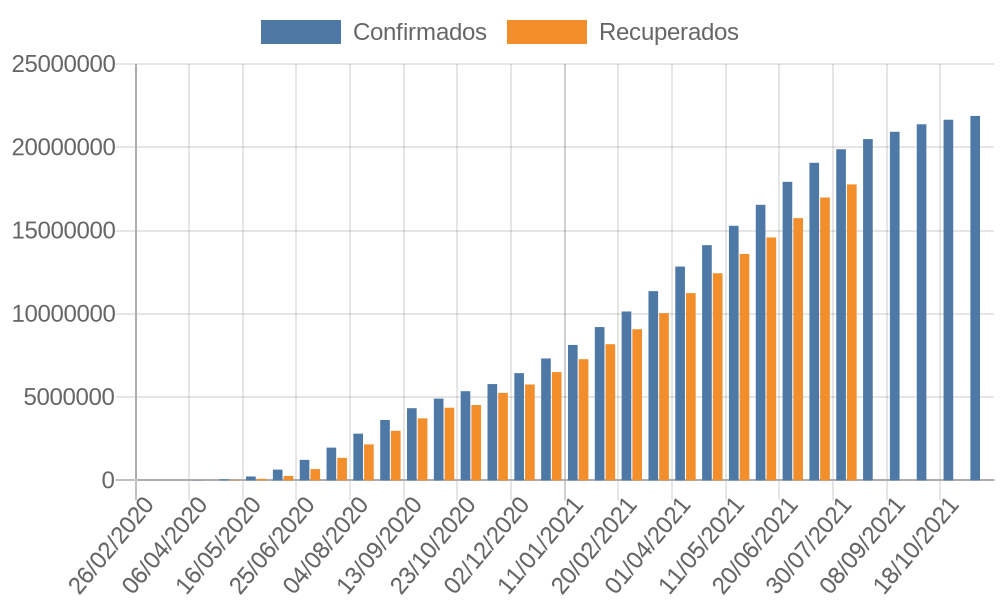

In [98]:
y_data_1 = []
for obs in final_data[1::20]:
    y_data_1.append(obs[confirmados])

y_data_2 = []
for obs in final_data[1::20]:
    y_data_2.append(obs[recuperados])

labels = ['Confirmados', 'Recuperados']

x = []
for obs in final_data[1::20]:
    x.append(obs[data].strftime('%d/%m/%Y'))

chart = create_chart(x, [y_data_1, y_data_2], labels, title='Gráfico: Confirmados vs Recuperados')
chart_content = get_api_chart(chart)
save_image('meu-primeiro-grafico.png', chart_content)
display_image('meu-primeiro-grafico.png')

In [66]:
from urllib.parse import quote

In [72]:
def get_api_qrcode(link):
    text = quote(link) #parsing do link para url
    url_base = 'https://quickchart.io/qr'
    resp = r.get(f'{url_base}?text={text}')
    return resp.content

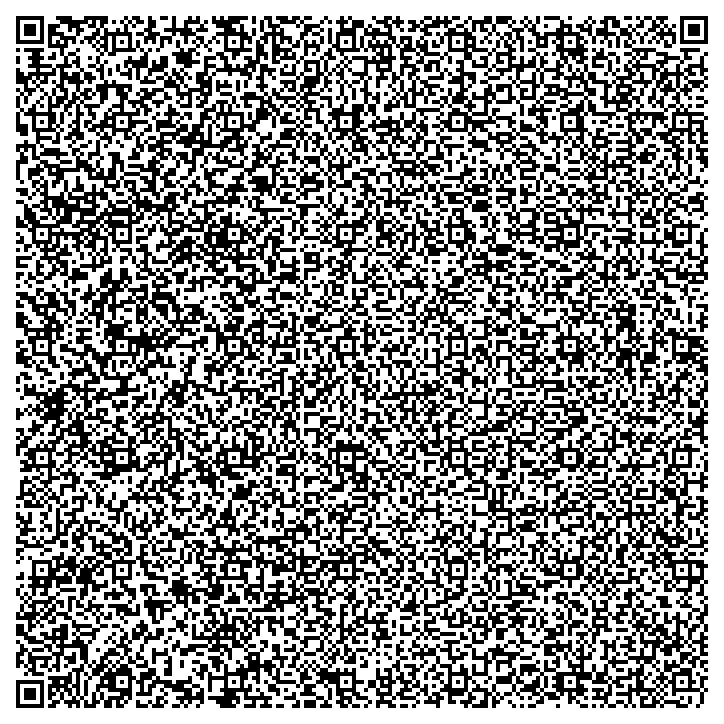

In [73]:
url_base = 'https://quickchart.io/chart'
link = f'{url_base}?c={str(chart)}'
save_image('qr-code.png', get_api_qrcode(link))
display_image('qr-code.png')